In [1]:
import torch
import dlc_practical_prologue as prologue

from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
from itertools import product

import utils
from utils_mt import accuracy_mt, train_model_mt

In [2]:
def load_data():
    train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(1000)
    return Variable(train_input), Variable(train_target), Variable(train_classes), Variable(test_input), Variable(test_target), Variable(test_classes)
    
train_input, train_target, train_classes, \
test_input, test_target, test_classes \
= load_data()

print ("Train : ", \
       "\n  input   : ", train_input.shape,\
       "\n  target  : ", train_target.shape, \
       "\n  aux     : ", train_classes.shape)
print ("Test : ", \
       "\n  input   : ", test_input.shape,\
       "\n  target  : ", test_target.shape, \
       "\n  aux     : ", test_classes.shape)

/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Train :  
  input   :  torch.Size([1000, 2, 14, 14]) 
  target  :  torch.Size([1000]) 
  aux     :  torch.Size([1000, 2])
Test :  
  input   :  torch.Size([1000, 2, 14, 14]) 
  target  :  torch.Size([1000]) 
  aux     :  torch.Size([1000, 2])


In [3]:
#trAuxY = train_classes.reshape((2, 1000))
trAuxY = train_classes.transpose(dim0=0, dim1=1)
teAuxY = test_classes.transpose(dim0=0, dim1=1)
trAuxY

tensor([[9, 5, 7,  ..., 1, 3, 1],
        [3, 4, 4,  ..., 4, 5, 1]])

In [4]:
class Net(nn.Module):
    def __init__(self, nb_hidden=100):
        
        super(Net, self).__init__()
        
        # weight shared part
        self.conv1 = nn.Conv2d(1, 32, kernel_size=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(512, nb_hidden)        
        self.fc2 = nn.Linear(nb_hidden, 10)
        
        # unified part
        self.fc3 = nn.Linear(20, 32)
        self.fc4 = nn.Linear(32, 2)
        
    
    def fw_aux (self, x_aux) :
        x = x_aux
        #print ("x_aux : ", x_aux.shape)
        x = self.conv1(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.conv2(x)
        #print ("-> ", x.shape)
        x = self.pool1(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.conv3(x)
        #print ("-> ", x.shape)
        x = self.pool2(x)
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.fc1(x.view(-1, 512))
        x = F.relu(x)
        #print ("-> ", x.shape)
        x = self.fc2(x)
        #print ("returning ", x.shape)
        #print ("returning ", x[0,0].type())
        return x

    def forward(self, x):        
        x1 = x[:,0:1,:,:]
        x2 = x[:,1:2,:,:]
        #print ( "x : ", x.shape)
        #print ( "x1 : ", x1.shape)
        #print ( "x2 : ", x2.shape)
        
        # Pass x1 and x2 through the weight-shared part
        x1_aux = self.fw_aux(x1)
        x2_aux = self.fw_aux(x2)
        #print ( "x1_aux : ", x1_aux.shape)
        #print ( "x2_aux : ", x2_aux.shape)
        
        # Group both result and pass them through the unified part
        x_main = torch.cat ([x1_aux, x2_aux], dim=1)
        #print ( "x_main : ", x_main.shape)
        x_main = F.relu(self.fc3(x_main))
        x_main = self.fc4(x_main)
        
        # Return both auxiliary tasks and primary task results
        #clear_output(wait=True)
        #print ( "fw")
        #print (x_main)
        return x_main, (x1_aux, x2_aux)

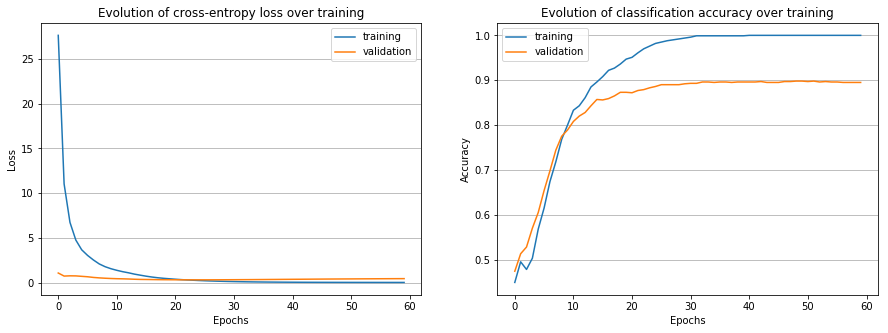

In [10]:
model = Net()
hist2 = train_model_mt(
    model, 
    train_input, train_target, trAuxY,
    test_input, test_target, teAuxY,
    eta=0.0005, mainLossWeight=0.2, epochs=60
)
utils.plot_hist(hist2)

Epoch 1/60
Epoch 2/60
Epoch 3/60
Epoch 4/60
Epoch 5/60
Epoch 6/60
Epoch 7/60
Epoch 8/60
Epoch 9/60
Epoch 10/60
Epoch 11/60
Epoch 12/60
Epoch 13/60
Epoch 14/60
Epoch 15/60
Epoch 16/60
Epoch 17/60
Epoch 18/60
Epoch 19/60
Epoch 20/60
Epoch 21/60
Epoch 22/60
Epoch 23/60
Epoch 24/60
Epoch 25/60
Epoch 26/60
Epoch 27/60
Epoch 28/60
Epoch 29/60
Epoch 30/60
Epoch 31/60
Epoch 32/60
Epoch 33/60
Epoch 34/60
Epoch 35/60
Epoch 36/60
Epoch 37/60
Epoch 38/60
Epoch 39/60
Epoch 40/60
Epoch 41/60
Epoch 42/60
Epoch 43/60
Epoch 44/60
Epoch 45/60
Epoch 46/60
Epoch 47/60
Epoch 48/60
Epoch 49/60
Epoch 50/60
Epoch 51/60
Epoch 52/60
Epoch 53/60
Epoch 54/60
Epoch 55/60
Epoch 56/60
Epoch 57/60
Epoch 58/60
Epoch 59/60
Epoch 60/60


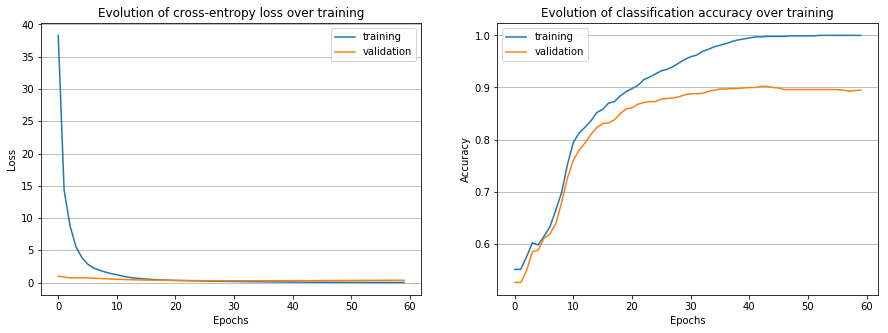

In [11]:
model = Net()
hist2 = train_model_mt(
    model, 
    train_input, train_target, trAuxY,
    test_input, test_target, teAuxY,
    eta=0.0005, mainLossWeight=0.1, epochs=60
)
utils.plot_hist(hist2)

Epoch 1/80
Epoch 2/80
Epoch 3/80
Epoch 4/80
Epoch 5/80
Epoch 6/80
Epoch 7/80
Epoch 8/80
Epoch 9/80
Epoch 10/80
Epoch 11/80
Epoch 12/80
Epoch 13/80
Epoch 14/80
Epoch 15/80
Epoch 16/80
Epoch 17/80
Epoch 18/80
Epoch 19/80
Epoch 20/80
Epoch 21/80
Epoch 22/80
Epoch 23/80
Epoch 24/80
Epoch 25/80
Epoch 26/80
Epoch 27/80
Epoch 28/80
Epoch 29/80
Epoch 30/80
Epoch 31/80
Epoch 32/80
Epoch 33/80
Epoch 34/80
Epoch 35/80
Epoch 36/80
Epoch 37/80
Epoch 38/80
Epoch 39/80
Epoch 40/80
Epoch 41/80
Epoch 42/80
Epoch 43/80
Epoch 44/80
Epoch 45/80
Epoch 46/80
Epoch 47/80
Epoch 48/80
Epoch 49/80
Epoch 50/80
Epoch 51/80
Epoch 52/80
Epoch 53/80
Epoch 54/80
Epoch 55/80
Epoch 56/80
Epoch 57/80
Epoch 58/80
Epoch 59/80
Epoch 60/80
Epoch 61/80
Epoch 62/80
Epoch 63/80
Epoch 64/80
Epoch 65/80
Epoch 66/80
Epoch 67/80
Epoch 68/80
Epoch 69/80
Epoch 70/80
Epoch 71/80
Epoch 72/80
Epoch 73/80
Epoch 74/80
Epoch 75/80
Epoch 76/80
Epoch 77/80
Epoch 78/80
Epoch 79/80
Epoch 80/80


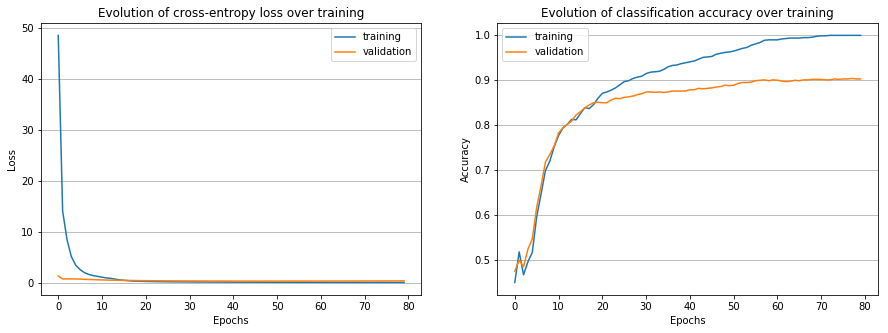

In [13]:
model = Net()
hist2 = train_model_mt(
    model, 
    train_input, train_target, trAuxY,
    test_input, test_target, teAuxY,
    eta=0.0005, mainLossWeight=0.03, epochs=80
)
utils.plot_hist(hist2)